In [1]:
%%bash
source /persisted_storage/Projects/spark.env

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path = '/persisted_storage/datasets/kaggle/black-friday/BlackFriday.csv'

In [4]:
# from pyspark import SparkContext
# from pyspark.sql import SQLContext
# sc = SparkContext()
# sqlContext = SQLContext(sc)
# df = sqlContext.read.format('com.databricks.spark.csv')\
#                             .options(header='true', inferSchema='true')\
#                             .load(data_path)
# df.take(1)
# df.toPandas().head()

In [5]:
df = pd.read_csv(data_path)
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [6]:
print(f'{df.shape[0]} samples and {df.shape[1]} features in the dataset')

537577 samples and 12 features in the dataset


In [7]:
print('Features:\n{}'.format(df.columns.tolist()))

Features:
['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [10]:
df.describe(include='O')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


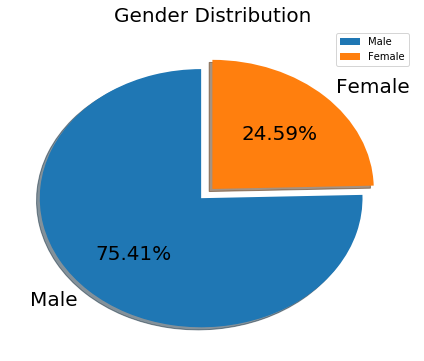

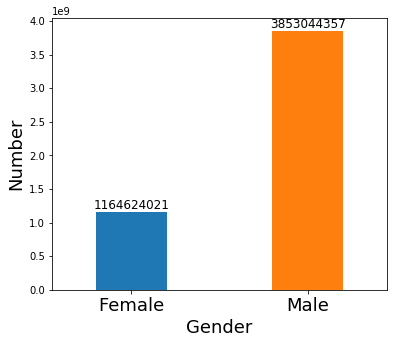

In [27]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect=0.8)) # aspect='equal'
explode = (0.1, 0)
labels = ['Male', 'Female']
ax.pie(df['Gender'].value_counts(), explode=explode, autopct='%1.2f%%', labels=labels, shadow=True, startangle=90, textprops={'fontsize':20})
ax.set_title('Gender Distribution', fontsize=20)
plt.tight_layout()
plt.legend(loc='upper right')
# plt.show()


fig, ax = plt.subplots(figsize=(6, 5))
gender_purchase = df.groupby('Gender')['Purchase'].sum().sort_values()
gender_purchase.plot.bar(width=0.4)
fig_config = {'color':'k', 'fontsize':'12', 'horizontalalignment':'center', 'verticalalignment':'bottom'}
for index, value in enumerate(gender_purchase):
    ax.text(index, value, str(value), fig_config)
ax.set_ylabel('Number', fontsize=18)
ax.set_xlabel('Gender', fontsize=18)
ax.set_xticklabels(['Female', 'Male'], rotation='horizontal', fontsize=18)
plt.show()

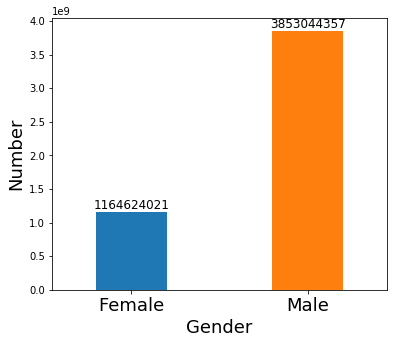

In [189]:
fig, ax = plt.subplots(figsize=(6, 5))
gender_purchase = df.groupby('Gender')['Purchase'].sum().sort_values()
gender_purchase.plot.bar(width=0.4)
fig_config = {'color':'k', 'fontsize':'12', 'horizontalalignment':'center', 'verticalalignment':'bottom'}
for index, value in enumerate(gender_purchase):
    ax.text(index, value, str(value), fig_config)
ax.set_ylabel('Number', fontsize=18)
ax.set_xlabel('Gender', fontsize=18)
ax.set_xticklabels(['Female', 'Male'], rotation='horizontal', fontsize=18)
plt.show()

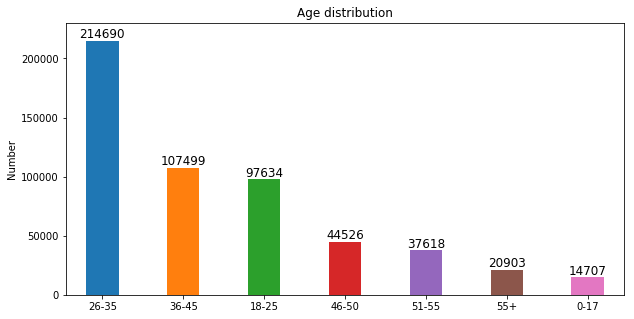

In [82]:
fig, ax = plt.subplots(figsize=(10, 5))
age_distribution = df['Age'].value_counts()
age_distribution.plot.bar(width=0.4)
fig_config = {'color':'k', 'fontsize':'12', 'horizontalalignment':'center', 'verticalalignment':'bottom'}
for index, value in enumerate(age_distribution):
    ax.text(index, value, str(value), fig_config)
ax.set_ylabel('Number')
ax.set_ylim(bottom=0, top=230000)
ax.set_title('Age distribution')
ax.set_xticklabels(age_distribution.index, rotation='horizontal')
plt.show()

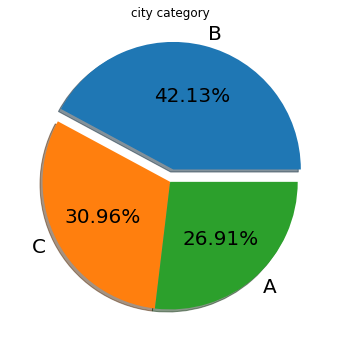

In [128]:
fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect='equal'))
city_category = df['City_Category'].value_counts()
explode = (0.1, 0, 0)
ax.pie(x=city_category, explode=explode, labels=city_category.index, autopct='%1.2f%%', shadow=True, textprops={'fontsize': 20})
ax.set_title('city category')
plt.tight_layout()
plt.show()

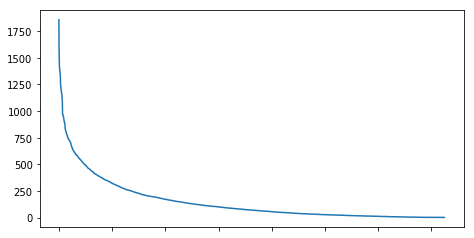

In [133]:
fig, ax = plt.subplots(figsize=(16, 4), subplot_kw=dict(aspect='equal'))
product_id = df['Product_ID'].value_counts()
product_id.plot()
plt.show()

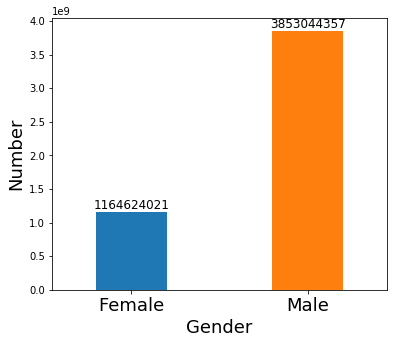